In [31]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [12]:
data = pd.read_csv('C:/Users/manan/OneDrive/Documents/cureya data set/heart.csv')
print(data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [10]:
print(data.shape)


(303, 14)


In [11]:
print(data.describe())


              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [14]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64


<AxesSubplot:>

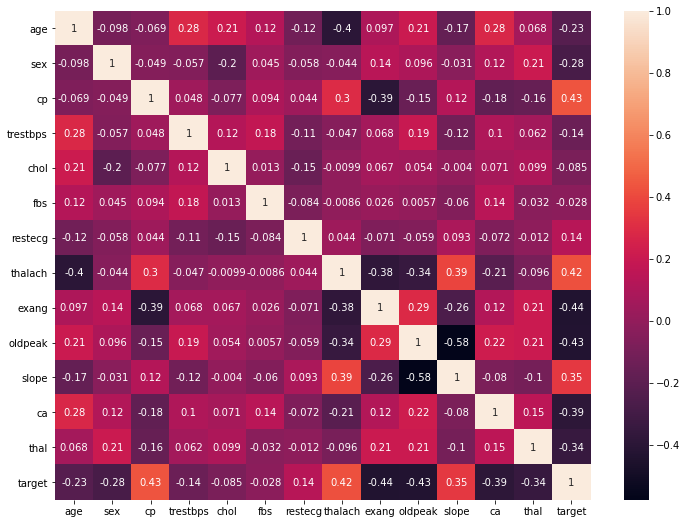

In [19]:
corr = data.corr()
print(corr['target'])
plt.subplots(figsize=(12, 9))
sns.heatmap(corr,annot =True)

Text(0.5, 1.0, 'people affected')

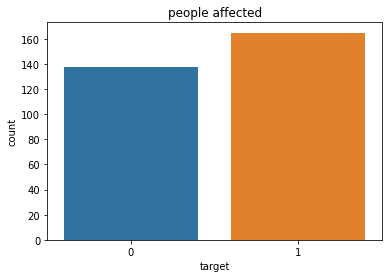

In [20]:
sns.countplot(x='target',data =data)
plt.title('people affected')

Text(0.5, 0, 'sex')

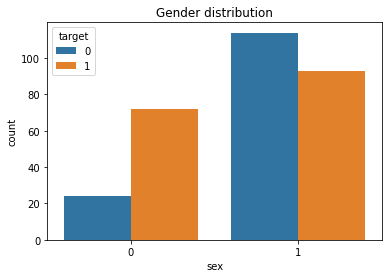

In [21]:
sns.countplot(x='sex',hue='target',data=data)
plt.title('Gender distribution')
plt.xlabel('sex')

Text(0.5, 1.0, 'Age')

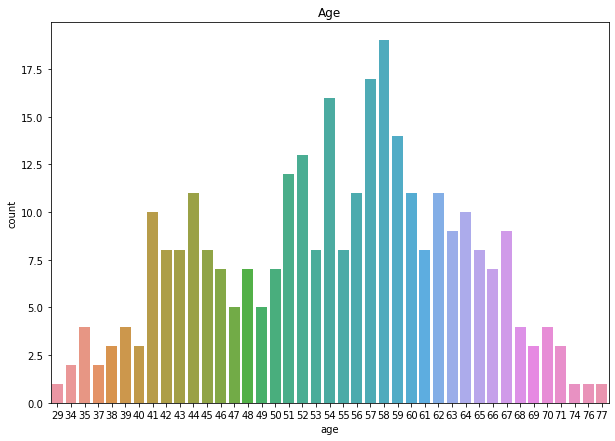

In [22]:
plt.subplots(figsize=(10, 7))
sns.countplot(x='age',data=data);
plt.title('Age')


([<matplotlib.axis.XTick at 0x2931abbff70>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

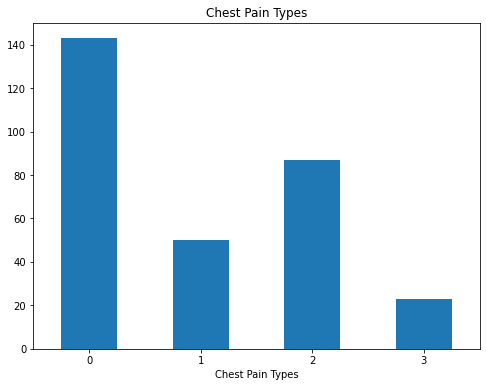

In [24]:
data.groupby(data['cp']).count()['target'].plot(kind = 'bar', title = 'Chest Pain Types', figsize = (8, 6))
plt.xlabel('Chest Pain Types')
plt.xticks(np.arange(4), rotation = 0)

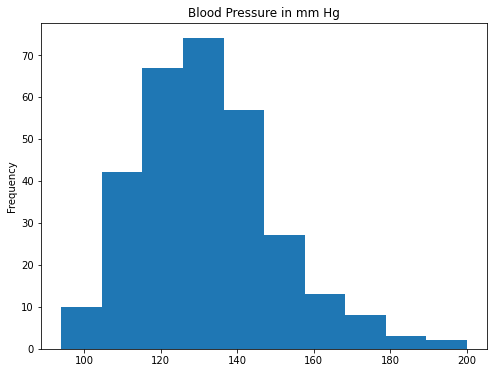

In [25]:
data['trestbps'].plot(kind = 'hist', title = 'Blood Pressure in mm Hg', figsize = (8, 6))
plt.show()

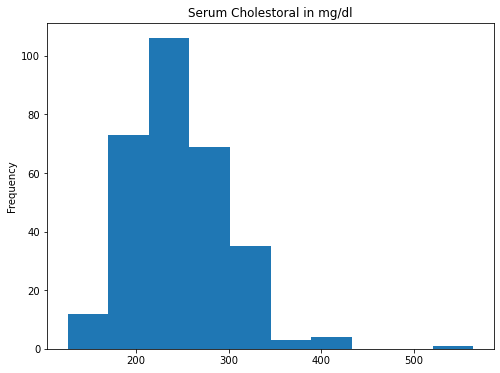

In [26]:
data['chol'].plot(kind = 'hist', title = 'Serum Cholestoral in mg/dl', figsize = (8, 6))
plt.show()

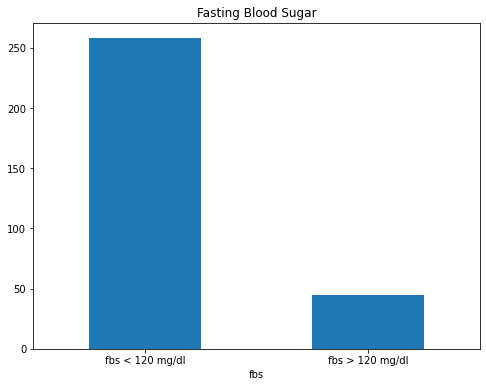

In [27]:
data.groupby(data['fbs']).count()['target'].plot(kind = 'bar', title = 'Fasting Blood Sugar', figsize = (8, 6))
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.show()

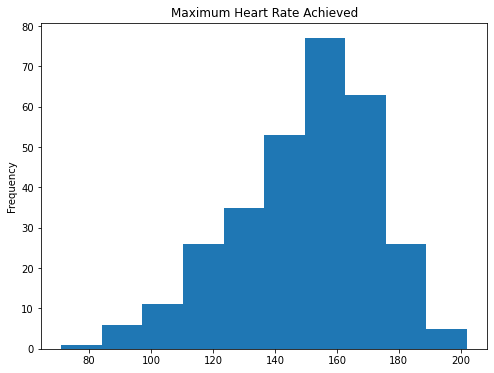

In [28]:
data['thalach'].plot(kind = 'hist', title = 'Maximum Heart Rate Achieved', figsize = (8, 6))
plt.show()

In [30]:
X = data.drop(['target'], axis = 1)
y = data['target']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [34]:
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_scv = svc_classifier.predict(X_test)
accuarcy_svm=accuracy_score(y_test, y_pred_scv)
print(accuarcy_svm)

0.6557377049180327


In [35]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 51, penalty = 'l1', solver='liblinear')
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_score(y_test, y_pred_lr)
accuarcy_lr=accuracy_score(y_test, y_pred_lr)
print(accuarcy_lr)

0.9180327868852459


In [36]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 51)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuarcy_dt=accuracy_score(y_test, y_pred_dt)
print(accuarcy_dt)

0.8360655737704918


In [37]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
accuarcy_rf=accuracy_score(y_test, y_pred_rf)
print(accuarcy_rf)

0.9016393442622951
